# Task 1: Linear Regression Task
    - This section explains how the Python Scikit-Learn library for ML can be used to implement regression functions. 

# Simple Linear Regression
    - This task predicts the percentage of marks that a student is expected to score based on the no. of hours they studied. 
    - This is a simple linear regression task as it involves just two variables.

In [20]:
# Importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# To visualize all the columns in the dataframe
pd.pandas.set_option("display.max_columns", None)

In [21]:
# Reading the Student_Scores dataset
data= pd.read_csv('student_scores.csv')
print("The student scores data is imported sucessfully")

The student scores data is imported sucessfully


In [22]:
# Shows the top 5 rows within the dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Plot

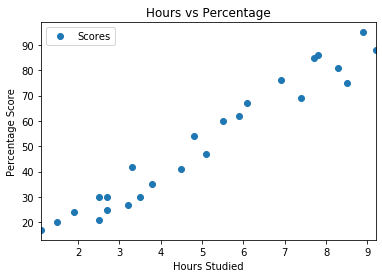

In [37]:
# Let's plot our dataset and see if we can manually find any relationship between the data. 
## We can create the plot with the following script:
###  Ploting the distribution of scores
# style = '+-','o-','.--','s:'
data.plot(x='Hours', y='Scores',  style='o')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title("Hours vs Percentage")
plt.show()

In [42]:
#The graph clearly shows that there is a positive linear relation between the no. of hours studied and percentage of score.
# if the no. of hourse is increased, then the percentage of score will be increased too

# Preparing the data
    - The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [10]:
X= data.iloc[:, :-1].values  
y= data.iloc[:, 1].values  

In [46]:
len(X), len(y)

(25, 25)

In [48]:
X, y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [64]:
# Now that we have our attributes and labels, 
## The next step is to split this data into train and test sets. 
### We'll do this by using Scikit-Learn's built-in train_test_split() method:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, 
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)

# Training the Algorithm
    - The data is splitted into training (%80) and testing (%20) sets, 
    - Then now is the time to train our algorithm.

In [66]:
# Import the Liner Regression 
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train, y_train)
print("Training has been Completed Successfully")

Training has been Completed Successfully


In [67]:
# To find the the best value for the intercept and slope (best fits)
model.intercept_

2.826892353899737

In [69]:
model.coef_

array([9.68207815])

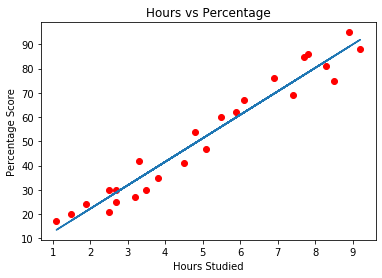

In [71]:
# Plotting the regression line
new_line = model.coef_ * X + model.intercept_

# Plotting for the test data
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title("Hours vs Percentage")
plt.scatter(X, y, color='r')
plt.plot(X, new_line);
plt.show()

# Making Predictions
    - After the model have trained successfully
    - it's time to make some predictions.

In [75]:
# Testing data - In Hours
print(X_test) 

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [78]:
# Predicting the scores
y_pred = model.predict(X_test) 
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [79]:
# Comparing Actual value with Predicted value
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [80]:
# Lets test with our data
hours = 9.25
our_pred = model.predict(np.array(hours).reshape(-1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(our_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


# Evaluating the model
    - The final step is to evaluate the performance of model.
    - There are some of the metrics have been used:
        - Mean Square Error (MSE)
        - Mean Absolute Error (MAE)
        - R2 Score

In [63]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.9657593887812133


In [83]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("Regression Model Metrics on the test set")
print(f"R^2 :{r2_score(y_test, y_pred)}")
print(f"MAE :{mean_absolute_error(y_test, y_pred)}")
print(f"MSE :{mean_squared_error(y_test, y_pred)}")

Regression Model Metrics on the test set
R^2 :0.9678055545167994
MAE :3.9207511902099244
MSE :18.943211722315272
